<a href="https://colab.research.google.com/github/VolatilityDoctor/Reimagining-Classic-Strategies/blob/main/Triangular_Exchange_Rates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import libraries we need
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Clean up the data
LOOK_AHEAD = 24
data = pd.read_csv("EURUSD XAGEUR XAGUSD Trigonometric Markets.csv")
data["Candles"] = np.arange(0,data.shape[0])
data["Target"] = data["XAUUSD Close"].shift(-LOOK_AHEAD) - data["XAUUSD Close"]
data.dropna(inplace=True)
data.reset_index(inplace=True,drop=True)
data

,Time,XAUUSD Close,GU Open,GU High,GU Low,GU Close,XG Open,XG High,XG Low,XG Close,...,XU High,XU Low,XU Close,SIN XU^GU,COS XU^GU,TAN XU^GU,SIN XG^GU,TAN XG^GU,Candles,Target
0,2022.04.21 09:00:00,1910.15,0.00227,0.00432,0.00331,0.00569,1352.40,1355.48,1351.26,1353.37,...,20.76,9.08,6.38,0.593428,-0.960166,-14.374625,0.279429,0.004714,12136,-4.73
1,2022.04.21 10:00:00,1917.50,0.00567,0.00585,0.00629,0.00735,1353.40,1353.67,1352.50,1352.54,...,5.76,3.27,11.01,-0.255084,-0.836182,0.336268,0.548452,0.008140,12137,-14.58
2,2022.04.21 11:00:00,1913.29,0.00735,0.00428,0.00520,0.00304,1352.55,1354.52,1352.03,1353.97,...,4.71,1.87,0.64,0.957418,-0.999216,3.419244,-0.039598,0.000473,12138,-9.86
3,2022.04.21 12:00:00,1909.48,0.00304,0.00250,0.00342,0.00321,1353.97,1354.79,1353.13,1354.61,...,-7.93,2.27,0.06,-0.636576,0.987549,4.424663,-0.157311,0.000044,12139,-3.84
4,2022.04.21 13:00:00,1907.41,0.00321,0.00237,0.00304,0.00080,1354.61,1355.09,1353.85,1354.74,...,-4.51,-3.34,-5.86,-0.251699,0.367880,3.514089,0.929873,-0.004326,12140,-1.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17784,2025.03.04 20:00:00,2915.19,0.00277,0.00518,0.00395,0.00681,16.84,14.43,12.45,9.53,...,25.42,30.00,27.34,-0.986105,0.963471,0.363413,-0.267814,-0.279729,29969,0.88
17785,2025.03.04 21:00:00,2911.63,0.00682,0.00789,0.00878,0.00974,9.73,8.81,6.78,5.50,...,23.29,24.94,20.21,-0.720798,0.073217,0.279066,0.997316,0.589890,29970,5.85
17786,2025.03.04 22:00:00,2911.19,0.00969,0.01009,0.01032,0.00864,5.48,5.45,6.87,5.92,...,22.24,20.99,20.37,0.312655,0.126061,0.299092,0.992022,0.308554,29971,9.37
17787,2025.03.04 23:00:00,2916.10,0.00865,0.00924,0.00874,0.00939,5.82,6.76,9.43,11.43,...,24.09,24.39,26.14,-0.993423,0.935376,0.467439,0.353655,-1.149015,29972,6.03


In [ ]:
#Drop the dates corresponding to our backtest
_ = data.iloc[-((24 * 365) - (63 * 24) -4):,:]
data = data.iloc[:-((24 * 365) - (63 * 24) -4),:]
data

,Time,XAUUSD Close,GU Open,GU High,GU Low,GU Close,XG Open,XG High,XG Low,XG Close,...,XU High,XU Low,XU Close,SIN XU^GU,COS XU^GU,TAN XU^GU,SIN XG^GU,TAN XG^GU,Candles,Target
0,2022.04.21 09:00:00,1910.15,0.00227,0.00432,0.00331,0.00569,1352.40,1355.48,1351.26,1353.37,...,20.76,9.08,6.38,0.593428,-0.960166,-14.374625,0.279429,0.004714,12136,-4.73
1,2022.04.21 10:00:00,1917.50,0.00567,0.00585,0.00629,0.00735,1353.40,1353.67,1352.50,1352.54,...,5.76,3.27,11.01,-0.255084,-0.836182,0.336268,0.548452,0.008140,12137,-14.58
2,2022.04.21 11:00:00,1913.29,0.00735,0.00428,0.00520,0.00304,1352.55,1354.52,1352.03,1353.97,...,4.71,1.87,0.64,0.957418,-0.999216,3.419244,-0.039598,0.000473,12138,-9.86
3,2022.04.21 12:00:00,1909.48,0.00304,0.00250,0.00342,0.00321,1353.97,1354.79,1353.13,1354.61,...,-7.93,2.27,0.06,-0.636576,0.987549,4.424663,-0.157311,0.000044,12139,-3.84
4,2022.04.21 13:00:00,1907.41,0.00321,0.00237,0.00304,0.00080,1354.61,1355.09,1353.85,1354.74,...,-4.51,-3.34,-5.86,-0.251699,0.367880,3.514089,0.929873,-0.004326,12140,-1.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10540,2023.12.29 18:00:00,2030.99,-0.00235,-0.00101,-0.00082,-0.00004,-4.07,-2.27,-2.28,-2.12,...,5.24,2.34,4.02,0.971608,0.900006,-0.582380,-0.435877,2.963606,22687,-28.90
10541,2023.12.29 19:00:00,2032.15,-0.00005,0.00231,0.00112,0.00235,-1.99,-1.62,-0.70,-0.65,...,3.54,2.12,3.56,-0.135176,0.798523,-0.184641,0.601964,1.042624,22688,-34.01
10542,2023.12.29 20:00:00,2032.50,0.00234,0.00226,0.00293,0.00224,-0.61,-0.84,-0.76,-0.34,...,4.12,5.78,6.37,-0.835624,-0.820421,-0.053426,-0.571759,0.114762,22689,-35.60
10543,2023.12.29 21:00:00,2032.40,0.00224,0.00206,0.00175,0.00195,-0.27,-1.33,-0.29,-0.48,...,4.00,4.75,3.36,-0.895529,0.086539,-0.143837,0.996248,-0.871448,22690,-35.73


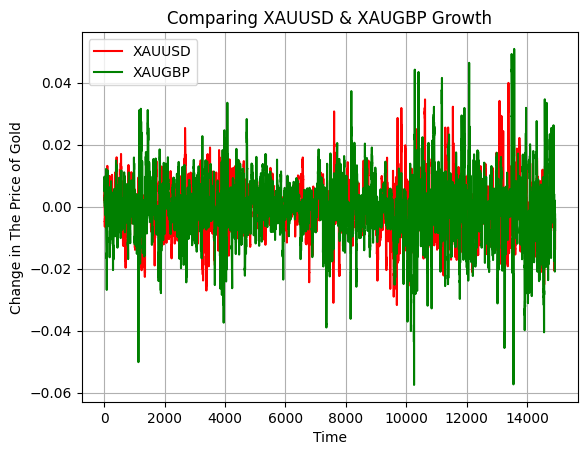

In [ ]:
plt.title("Comparing XAUUSD & XAUGBP Growth")
plt.plot((data['XU Close'] / data.loc[0,"XU Close"]) / (data['XU Close'].max() - data['XU Close'].min()),color="red")
plt.plot((data['XG Close'] / data.loc[0,"XG Close"]) / (data['XG Close'].max() - data['XG Close'].min()),color="green")
plt.ylabel("Change in The Price of Gold")
plt.xlabel("Time")
plt.legend(["XAUUSD","XAUGBP"])
plt.grid()

In [ ]:
X = data.iloc[:,1:-1].columns
y = "Target"

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor,RadiusNeighborsRegressor
from sklearn.svm import LinearSVR, SVR,NuSVR
from sklearn.model_selection import TimeSeriesSplit,cross_val_score

In [ ]:
tscv = TimeSeriesSplit(n_splits=5,gap=LOOK_AHEAD)

In [ ]:
model = SVR()

In [ ]:
#No data
np.mean(np.abs(cross_val_score(model,data.loc[:,["Candles"]] * 0,data.loc[:,"Target"],cv=tscv)))

0.008147237218324398

In [ ]:
#Time
np.mean(np.abs(cross_val_score(model,data.loc[:,["Candles"]],data.loc[:,"Target"],cv=tscv)))

0.16753130807184635

In [ ]:
#XAUUSD Data
np.mean(np.abs(cross_val_score(model,data.loc[:,["XU Open","XU High","XU Low","XU Close"]],data.loc[:,"Target"],cv=tscv)))

0.07930160352345805

In [ ]:
#All the data
np.mean(np.abs(cross_val_score(model,data.iloc[:,2:-1],data.loc[:,"Target"],cv=tscv)))

0.2604211574787054

In [ ]:
#Normal OHLC Data from all 3 markets
np.mean(np.abs(cross_val_score(model,data.iloc[:,2:-7],data.loc[:,"Target"],cv=tscv)))

0.05520234441413754

In [ ]:
#Trig transformed data
np.mean(np.abs(cross_val_score(model,data.iloc[:,14:-2],data.loc[:,"Target"],cv=tscv)))

0.02859224155133444

In [ ]:
import onnx
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
model = SVR()
model.fit(data.iloc[:,14:-2],data.loc[:,"Target"])
initial_types = [("float_input",FloatTensorType([1,5]))]
xauusd_model_proto = convert_sklearn(model,initial_types=initial_types,target_opset=12)
onnx.save(xauusd_model_proto,"XAUUSD Trig Model.onnx")